# Data Hackerspace 'Midterm'
** 15 points total **

These problems are designed to be a bit different from the previous 'challenge' problems. Instead of instructing you to do something very specific, these problems are more general and approach-driven (like something you'd see on an actual interview, or in a Data Science job).

Thus, the process of completing these problems is just as important as the 'correctness' of the answers. These questions are also a bit more open ended. Make the assumptions that you think are valid, and be sure to **comment in** those assumptions in your code.

* Due Date: **November 29th, 11:59pm. No late Submissions.**
* Credit is given for both accuracy, and a thoughtful algorithmic approach.
* Submit this assignment emailing your completed `*.ipynb` to Tyler using the email we gave you in class (Keep your output!)

## Problem 1: Email Address Matching
** 4 points **

You are given a list of names and a list of email addresses.  How would you automatically assign the 'best' email from the list of emails to the corresponding name from the list of names?

You can find a list of names in `./names.txt` and the list of emails in `./emails.txt`.

Output a list of `(name, email)` tuples for name/email pairs that you think match 'best'.

In [1]:
# This probably won't work in non-*nix operating systems
!head names.txt
!echo
!head emails.txt

Mary Williams
Charles Deanna West
Jacob Jessica Andrews
Javier Daisy Sparks
Paula A. Graham
Jasmine Herman
Matthew Foster
Ernest Michael Bowman
Chad Hernandez
Donna Martin

campbell@yahoo.com
ahansen@yahoo.com
jcross@gmail.com
justin.r.moore@hotmail.com
jadams@gmail.com
tgomez@yahoo.com
roth@smith-chen.com
mary.r.anderson@yahoo.com
sabrina.v.conrad@gmail.com
nelson@hotmail.com


In [213]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def email_matcher(emails_file, names_file):
    #load info in the names.txt
    with open('names.txt') as f1:
        names = f1.read()
        names = names.split("\n")
    #load info in the emails.txt
    with open('emails.txt') as f2:
        emails = f2.read()
        emails = emails.split("\n")
    #init a dictionary
    dic = {}
    pre_emails = []
    #traverse the emails list, spilt the strings with "@"
    for email in emails:
        # [0] is the name [1] is the domain
        pre = email.split("@")[0]
        pre_emails.append(pre)
        dic[pre] = email

    result = []
    for name in names[0:10]:
        choices = pre_emails
        #use fuzzywuzzy to match it
        correspond = process.extractOne(name,choices)
        # [1] is the percent of matching
        pre = correspond[0]
        email = dic[pre]
        r = (name,email)
        #print(r)
        result.append(r)
    return result
email_matcher('emails.txt', 'names.txt')

[('Mary Williams', 'mary.williams@yahoo.com'),
 ('Charles Deanna West', 'west@hotmail.com'),
 ('Jacob Jessica Andrews', 'andrews@owens.com'),
 ('Javier Daisy Sparks', 'javier.sparks@gmail.com'),
 ('Paula A. Graham', 'graham@hotmail.com'),
 ('Jasmine Herman', 'herman@yahoo.com'),
 ('Matthew Foster', 'matthew.foster@gmail.com'),
 ('Ernest Michael Bowman', 'bowman@guerrero-chen.net'),
 ('Chad Hernandez', 'hernandez@sanchez.com'),
 ('Donna Martin', 'martin@taylor.net')]

## Problem 2: San Francisco City Salaries
** 2 points **

In `Salaries.csv`, you'll find a list of pay data for the public employees of San Francisco City for the years 2011 - 2014

Write a function that will take this data and plot the median pay change by occupation between 2011 and 2014. You can limit your visualization to the top 25 most populous professions.

(Data courtesy of https://www.kaggle.com/kaggle/sf-salaries)

In [2]:
!head Salaries.csv

Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,,567595.43,567595.43,2011,,San Francisco,
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,,538909.28,538909.28,2011,,San Francisco,
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,,335279.91,335279.91,2011,,San Francisco,
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,,332343.61,332343.61,2011,,San Francisco,
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,,326373.19,326373.19,2011,,San Francisco,
6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,,316285.74,316285.74,2011,,San Francisco,
7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,,315981.05,315981.05,2011,,San Francisco,
8,DAVID KUSHNER,DEPUTY DIRECTOR

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/home/yabo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2827: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


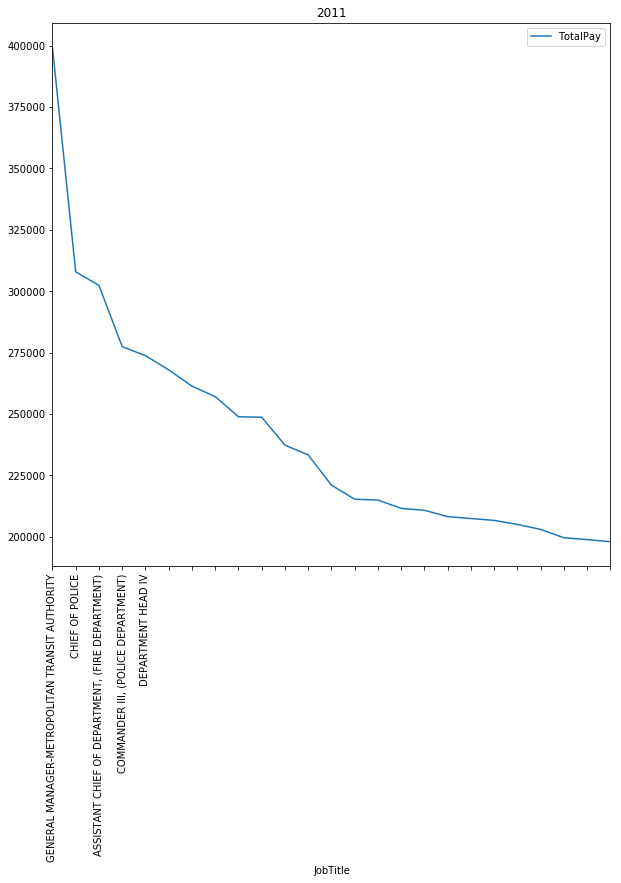

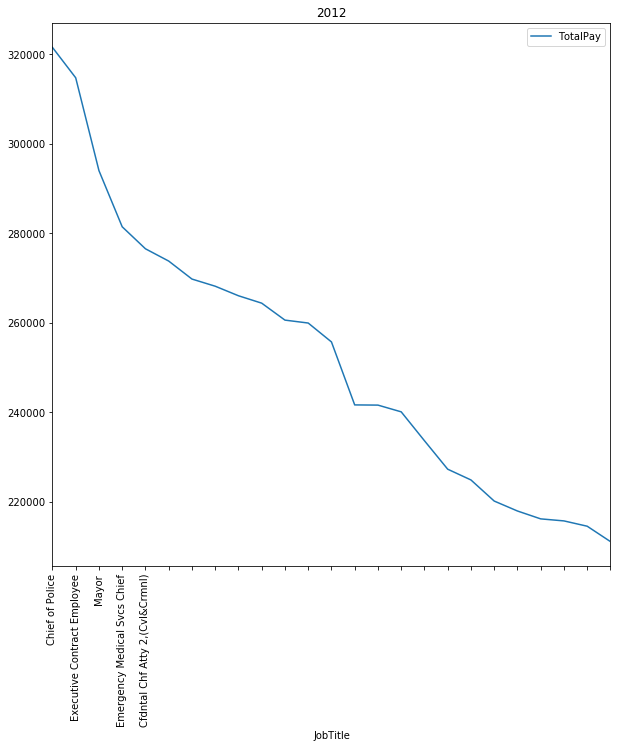

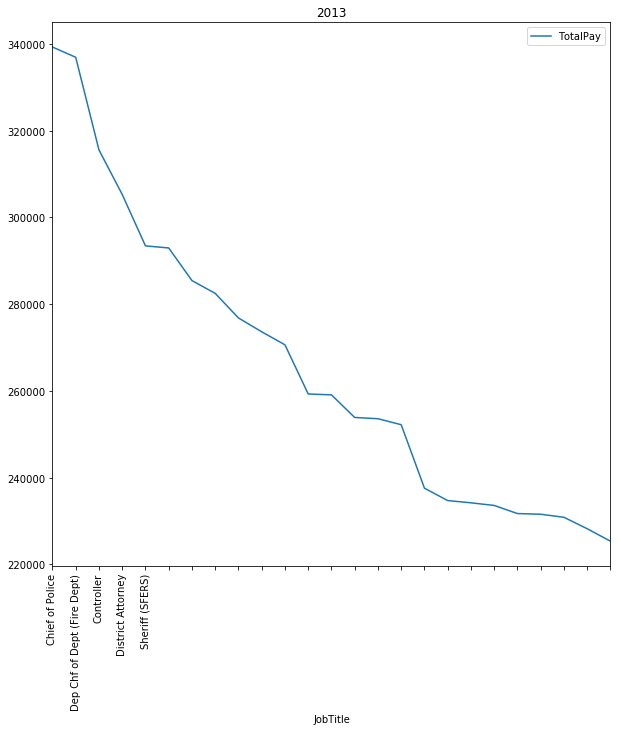

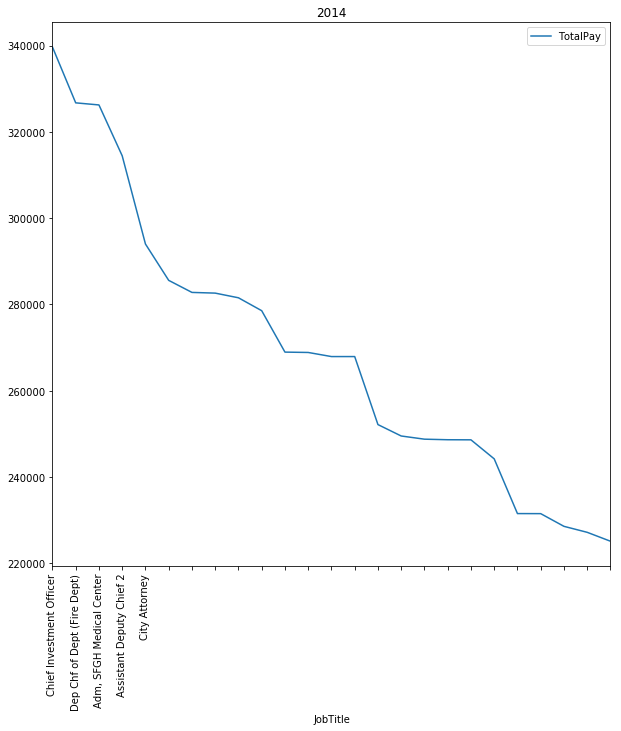

In [207]:
def median_sf_salaries_change(filename):
    #load the dataset
    df = pd.read_csv(filename)
    # "Year-2011"
    # creat groups by JobTitle, select Column-TotalPay, caculate their median, sorted in increasing order, get the top25
    # plot, np.arange(25) makes the x-axis, rotate the items of x making it clear to see
    df_2011 = df[df['Year']==2011].groupby(['JobTitle'])[['TotalPay']].median().sort_values(by='TotalPay', ascending=False).head(25)
    df_2011.plot(figsize=(10,10),title='2011')
    plt.xticks(np.arange(25), rotation=90)
    # similar to the above
    df_2012 = df[df['Year']==2012].groupby(['JobTitle'])[['TotalPay']].median().sort_values(by='TotalPay', ascending=False).head(25)
    df_2012.plot(figsize=(10,10),title="2012")
    plt.xticks(np.arange(25), rotation=90)
    # similar to the above
    df_2013 = df[df['Year']==2013].groupby(['JobTitle'])[['TotalPay']].median().sort_values(by='TotalPay', ascending=False).head(25)
    df_2013.plot(figsize=(10,10),title='2013')
    plt.xticks(np.arange(25), rotation=90)
    # similar to the above
    df_2014 = df[df['Year']==2014].groupby(['JobTitle'])[['TotalPay']].median().sort_values(by='TotalPay', ascending=False).head(25)
    df_2014.plot(figsize=(10,10),title='2014')
    #plt.show()
    plt.xticks(rotation=90)
median_sf_salaries_change('Salaries.csv')

## Problem 3: Airline Tweets
** 3 points **

Given a dataset of Tweets regarding different airlines (`Tweets.csv`), write a function that returns an ordered list of the most serious complaints against each airline.

**Note:** The sentiment analysis has already been performed, and you are given a sentiment score, complaint label (`negativearesas`), and complaint label confidence markers for each tweet. For maximum accuracy, you may wish to utilize all three of these values in your analysis.

(Data courtesy of https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

In [3]:
!head Tweets.csv

tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
570306133677760513,neutral,1.0,,,Virgin America,,cairdin,,0,@VirginAmerica What @dhepburn said.,,2015-02-24 11:35:52 -0800,,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,,0.0,Virgin America,,jnardino,,0,@VirginAmerica plus you've added commercials to the experience... tacky.,,2015-02-24 11:15:59 -0800,,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,,,Virgin America,,yvonnalynn,,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0,Bad Flight,0.7033,Virgin America,,jnardino,,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",,2015-02-24 11:

In [224]:
import operator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def airline_complaints(filename, airline):
    #load the data
    df = pd.read_csv(filename)
    # get the column with negative sentiment
    is_negative = (df['airline_sentiment'].str.contains("negative")) & (df['airline'].str.contains(airline)) 
    negative_tweets = df[is_negative]
    # list of tweet_id and complain process
    l = []
    #use nltk help analyse the words
    t = SentimentIntensityAnalyzer()
    for i, r in negative_tweets.iterrows():
        s = t.polarity_scores(r['negativereason'])
        #calculate the complain process
        l.append([r['tweet_id'], r['negativereason'], (r['airline_sentiment_confidence'] * (r['negativereason_confidence'] + s['neg'])/2)])
    sorted_list = sorted(l, key=lambda x: x[2], reverse=True)

    return (sorted_list)

airline_complaints('Tweets.csv', 'American')

[[570306715599695874, 'Bad Flight', 0.889],
 [570305063052283904, 'Bad Flight', 0.889],
 [570304544128815104, 'Bad Flight', 0.889],
 [570263871526559745, 'Bad Flight', 0.889],
 [570232494034964481, 'Bad Flight', 0.889],
 [570230559693078528, 'Bad Flight', 0.889],
 [570009856851222529, 'Bad Flight', 0.889],
 [569977521690669056, 'Bad Flight', 0.889],
 [569931327253966849, 'Bad Flight', 0.889],
 [569923221341908992, 'Bad Flight', 0.889],
 [569782378270314498, 'Bad Flight', 0.889],
 [569674597479677952, 'Bad Flight', 0.889],
 [569588464896876545, 'Bad Flight', 0.889],
 [569945910546989057, 'Damaged Luggage', 0.872],
 [569852965315584000, 'Damaged Luggage', 0.872],
 [570289085354541058, 'Lost Luggage', 0.8485],
 [570287747643998208, 'Lost Luggage', 0.8485],
 [570275010759102466, 'Lost Luggage', 0.8485],
 [570289085354541058, 'Lost Luggage', 0.8485],
 [570288282413633536, 'Lost Luggage', 0.8485],
 [570287747643998208, 'Lost Luggage', 0.8485],
 [570275010759102466, 'Lost Luggage', 0.8485],
 

## Problem 4: City Name Cleaning
** 3 points**

Suppose you have a very large list of the names of all large cities in the world. (Number of records ~= 100,000) Many of these cities will contain common overlapping words like “Mobile”, “Rugby” or “Salmon”. Your task is to automatically (and hopefully quickly) filter out as many of these 'common' words as possible. Output a list of world cities that have these common words removed.

Unfortunately, we don't have a clean list of cities, but rather a `*.csv` file that contains a bunch of other information. You can find this file in `worldcities.csv`

(Data courtesy of https://www.maxmind.com/en/free-world-cities-database)

In [221]:
!tail worldcities.csv

us,wright,Wright,WY,,43.7469444,-105.4700000
us,wyarno,Wyarno,WY,,44.8133333,-106.7733333
us,wycross,Wycross,WY,,41.6805556,-104.1894444
us,wyocolo,Wyocolo,WY,,41.0044444,-106.1719444
us,wyodak,Wyodak,WY,,44.2913889,-105.3791667
us,wyoming,Wyoming,WY,,41.4775000,-105.6361111
us,wyopo,Wyopo,WY,,42.8555556,-108.6886111
us,y-o ranch,Y-O Ranch,WY,,42.0308333,-104.9394444
us,yanceys,Yanceys,WY,,44.9308333,-110.4355556
us,yoder,Yoder,WY,,41.9169444,-104.2952778

In [211]:
import nltk
import pandas as pd
import re

def city_name_cleanser(filename):
    #read file
    df = pd.read_csv(filename,encoding='Latin1')
    cities = list(df["City"])
    words = []
    #analyze city names
    for city in cities:
        words.extend(city.split(" "))
    counts  = nltk.FreqDist(words)
    
    #find the most common overlapping words
    common = counts.most_common(1000)
    
    str1 = "-".join(cities)
    #remove common words from cities names if cities is consisted of two or more words
    for word in common:
    # use regular expression to replace the common words
        p1 = re.compile(' '+word[0])
        p2 = re.compile(word[0]+' ')
    #print(p)
    #print(p.sub(' ', str1))
        str1 = p1.sub('', str1)
        str1 = p2.sub('', str1)
    cities = str1.split("-")
    #list of cities with common overlapping words removed
    return cities


city_name_cleanser('worldcities.csv')

['abberley',
 'abberton',
 'abberton',
 'abbess roding',
 'abbey',
 'cwmhir',
 'abbey dore',
 'abbeyans',
 'abbey',
 'abbots ann',
 'abbots bickington',
 'abbots bromley',
 'abbotsbury',
 'abbotsford',
 'abbotsham',
 'abbotskerswell',
 'abbotsngley',
 'abbotsnch',
 'abbotsley',
 'abbots ripton',
 'abbots worthy',
 'abbotts ann',
 'abbotts ripton',
 'aber',
 'aberaeron',
 'aberaman',
 'aberangell',
 'aberarder',
 'aberargie',
 'aber',
 'arth',
 'aberayron',
 'aberbargoed',
 'aberbeeg',
 'aber',
 'bran',
 'abercairny',
 'abercanaid',
 'abercarn',
 'abercastle',
 'aberchalder',
 'aberchirder',
 'aberconway',
 'aber cowarch',
 'abercynon',
 'aberdalgie',
 'aberdare',
 'aberdaron',
 'aberdaugleddau',
 'aberdeen',
 'aberdeen',
 'aberdeen',
 'aberdeen',
 'aberdeenshire',
 'aberdour',
 'aberdour',
 'aberdovey',
 'aberdulais',
 'aberdyfi',
 'aberearne',
 'aberedw',
 'abereiddy',
 'abererch',
 'aberfam',
 'aberfan',
 'aberfeldy',
 'aberffraw',
 'aberfield',
 'aberford',
 'aberfoyle',
 'abergaven

## Problem 5: IMDB Crawler
** 3 points **

In an earlier challange problem, you wrote code to take an IMDB page and parse out specific information about the movie and cast.

In this problem, you will go a step further and write a web-scraper to build a database of movie information.

Write a function that takes as an argument a 'seed' URL (guaranteed to be somewhere on www.imdb.com) and crawls the movie links that it finds on that page. You should save the following characteristics about each movie:

* Title
* Rating
* Duration
* Release Date
* Budget

For the sake of time, you can also **limit your crawler to scraping and saving 25 movies.**

The function should save the data to a JSON file.

** Note: ** You're encouraged to separate your code into function(s) that scrape data from IMDB, and function(s) that perform the crawling logic.

In [220]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd
import re

In [219]:
def imdb_crawler(seed_url, out_file):
    #request the page
    #get the raw html 
    html = requests.get('http://www.imdb.com/').text
    #html.text
    #use regular expression to find all
    tt_list = list(re.findall("tt[0-9]+",html))
    # map: do something to each in the list, creat the new url with the list
    url_list = list(map(lambda a : "http://www.imdb.com/title/" + a + "/", tt_list))
    # set, remove the repeated urls
    url_list = list(set(url_list))
    
    data = []

    for movie_url in url_list:
        #dictionary for current movie
        mov_dict = {}
        #request the page
        # get raw html
        html_0 = request.get(movie_url).text
        #use regular expression find title
        escaped_title = re.escape('<h1 itemprop="name" class="">')+'(.*)'+re.escape('&nbsp;<span id="titleYear">')
        title = re.search(escaped_title,html_0)
        if title != None:
            mov_dict['title'] = title.group(1)

        # duration
        escaped_duration = re.escape('<time itemprop="duration" datetime="') + '.*' + re.escape('">')+'(.*)' + re.escape('</time>')
        duration = re.search(escaped_duration,html_0)
        # clean the data with space line
        if duration != None:
            duration = duration.group(1)
            duration = duration.replace('\\n','')
            duration = duration.strip()
            mov_dict['duration'] = duration
        data.append(mov_dict)
    # creat new data frame with the list; use pandas creat csv
    data_df = pd.DataFrame(data)
    data_df.to_csv(out_file)

imdb_crawler('http://www.imdb.com/', 'movies.json')
